В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе Kaggle, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.
Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 
Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.
Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

In [1]:
"""Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""Прочитаем наши данные и выведем первые пять строк таблицы с помощью head(), чтобы убедиться в том, что всё подгрузилось верно:
"""
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
"""Дополнительно посмотрим на последние пять строк таблицы с помощью tail():
"""
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [6]:
"""Задание 2.2
Сколько районов Москвы и Московской области представлено в данных?
"""
print(sber_data['sub_area'].nunique())

146


In [8]:
"""Задание 2.3
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.
Присмотритесь к нему — не кажется ли оно вам странным? Мы к нему ещё вернемся :)"""
print(sber_data['price_doc'].max())

111111112


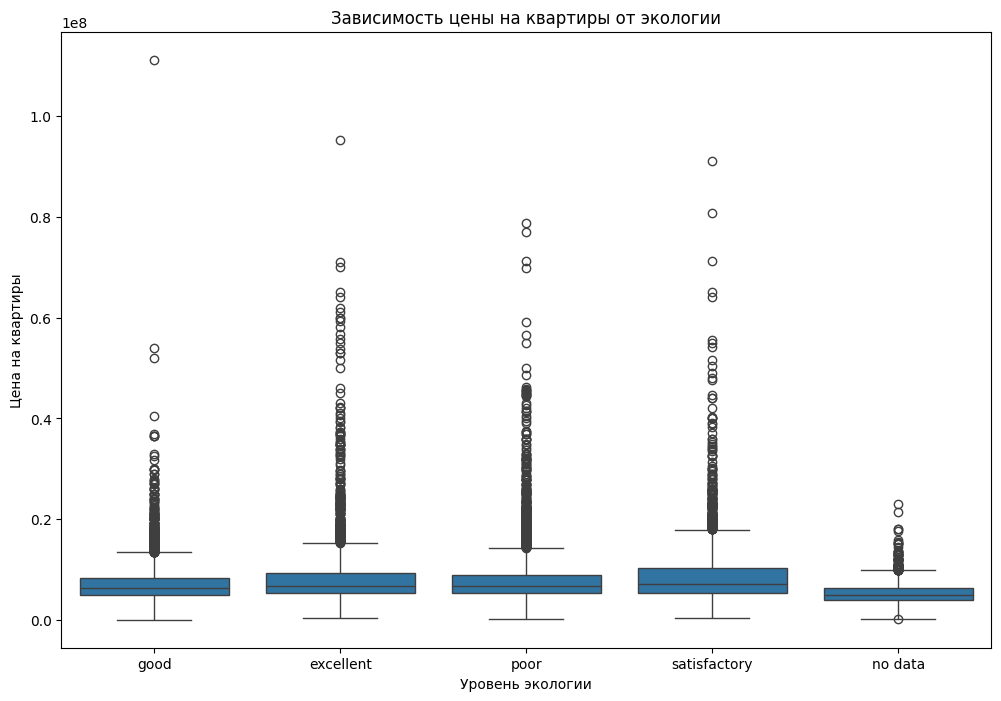

In [11]:
"""Задание 2.4
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры.
Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня
экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?
Введите название этой категории без кавычек."""
#sber_data.info()
# Создаем коробчатую диаграмму
plt.figure(figsize=(12, 8))
sns.boxplot(x='ecology', y='price_doc', data=sber_data)

# Настройка внешнего вида диаграммы
plt.title('Зависимость цены на квартиры от экологии')
plt.xlabel('Уровень экологии')
plt.ylabel('Цена на квартиры')

# Показываем диаграмму
plt.show()

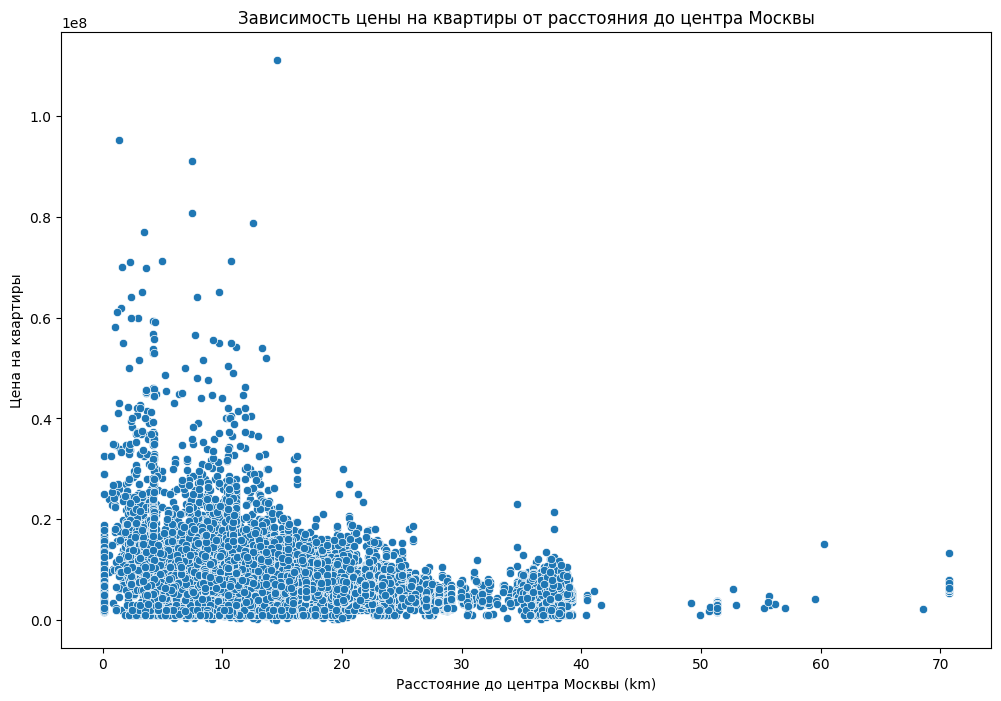

In [12]:
"""Задание 2.5
Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc)
связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения."""
# Создаем диаграмму рассеяния
plt.figure(figsize=(12, 8))
sns.scatterplot(x='kremlin_km', y='price_doc', data=sber_data)

# Настройка внешнего вида диаграммы
plt.title('Зависимость цены на квартиры от расстояния до центра Москвы')
plt.xlabel('Расстояние до центра Москвы (km)')
plt.ylabel('Цена на квартиры')

# Показываем диаграмму
plt.show()

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

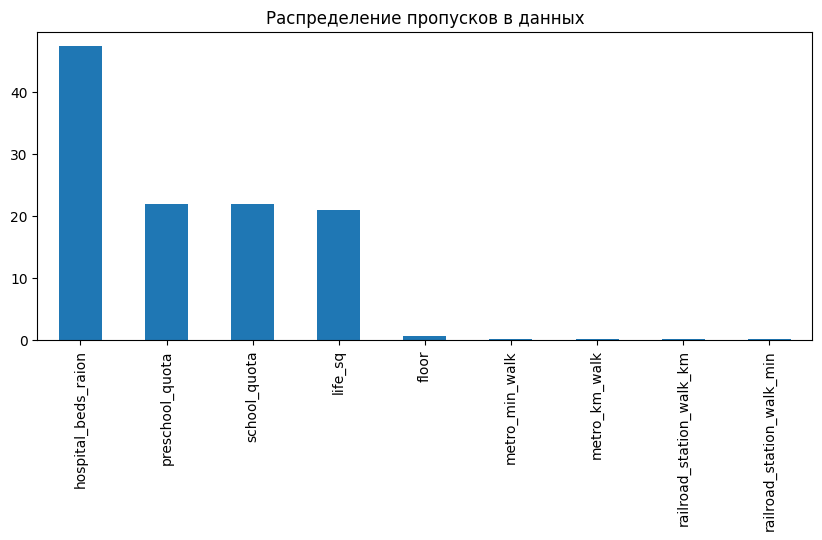

In [14]:
"""ПИСОК СТОЛБЦОВ С ПРОПУСКАМИ
Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 
Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.
Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:"""
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

"""ТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ
Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков
с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 
Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к 
числу записей. Самый быстрый способ построить её — использовать метод plot():"""
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

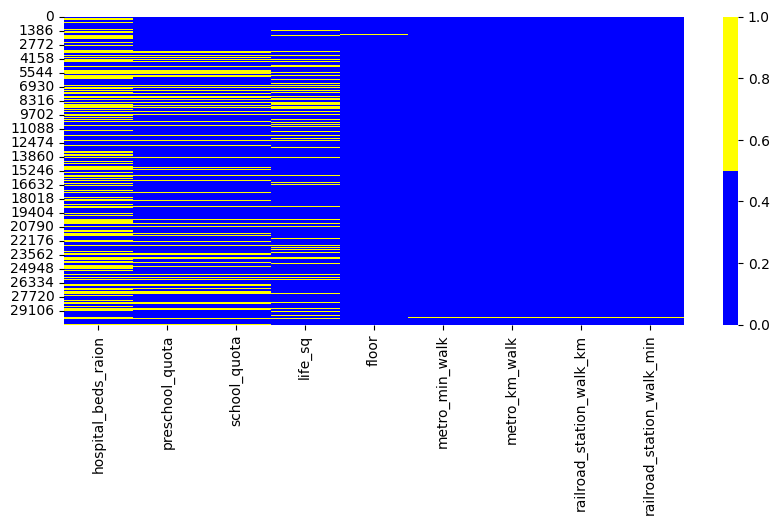

In [15]:
"""ТЕПЛОВАЯ КАРТА ПРОПУСКОВ 
Ещё один распространённый способ визуализации пропусков — тепловая карта. 
Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она позволяет понять не только соотношение пропусков в данных,
 но и их характерное местоположение в таблице. 
Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых есть пропуск,
 будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода 
 color_pallete() из библиотеки seaborn."""
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [17]:
"""Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 
Основные параметры метода:
axis — ось, по которой производится удаление (по умолчанию 0 — строки).
how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; 
all — если во всех столбцах есть пропуски). 
thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. 

Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем  и более, где  — число признаков (если ).
Примечание: Начиная с версии 1.5.0 Pandas запрещает одновременно устанавливать параметры how и thresh. 
При использовании этих параметров одновременно возникает ошибка:
TypeError: You cannot set both the how and thresh arguments at the same time.
Это связано с тем, что, например, если установить параметр how='all' и установить thresh в какое-то конкретное значение, 
то возникает противоречие: мы будем пытаться удалить столбцы/строки, одновременно при условии, что во всех столбцах/строках 
есть пропуски, но при этом стоит ограничение константой thresh. Метод dropna() не понимает, как действовать - какое ограничение 
принять за основное в таких случаях - и поэтому в новой версии библиотеки было решено запретить формирование таких условий.

Предварительно создадим копию исходной таблицы — drop_data, чтобы не повредить её. Зададимся порогом в 70 %: будем оставлять 
только те столбцы, в которых 70 и более процентов записей не являются пустыми . После этого удалим записи, в которых содержится 
хотя бы один пропуск. Наконец, выведем информацию о числе пропусков и наслаждаемся нулями. """

#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
print(drop_data.shape)

(20888, 60)


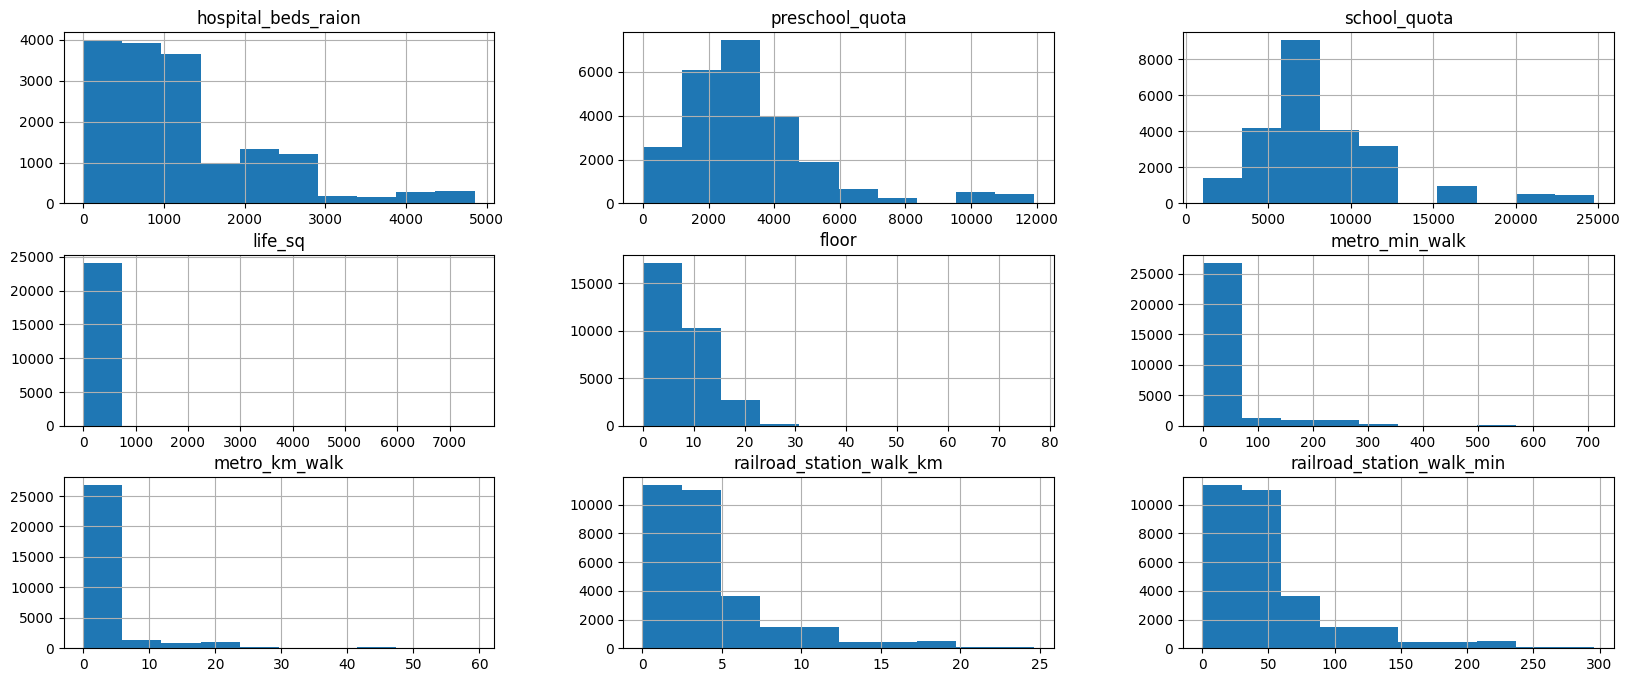

In [18]:
"""ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ
Чтобы дырявая бочка не протекала, вставьте в дырку пробку. С этой мыслью связан другой способ бороться с пропусками — заполнение константами. 
Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков. 
Схема метода представлена на рисунке:
Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками. 
Давайте выведем их на экран. 
В pandas это можно сделать с помощью метода hist():"""
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

In [19]:
"""Итак, рассмотрим несколько рекомендаций.

Для распределений, похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать медианное значение для таких признаков.
Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.
Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.
Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!
Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:

"""
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

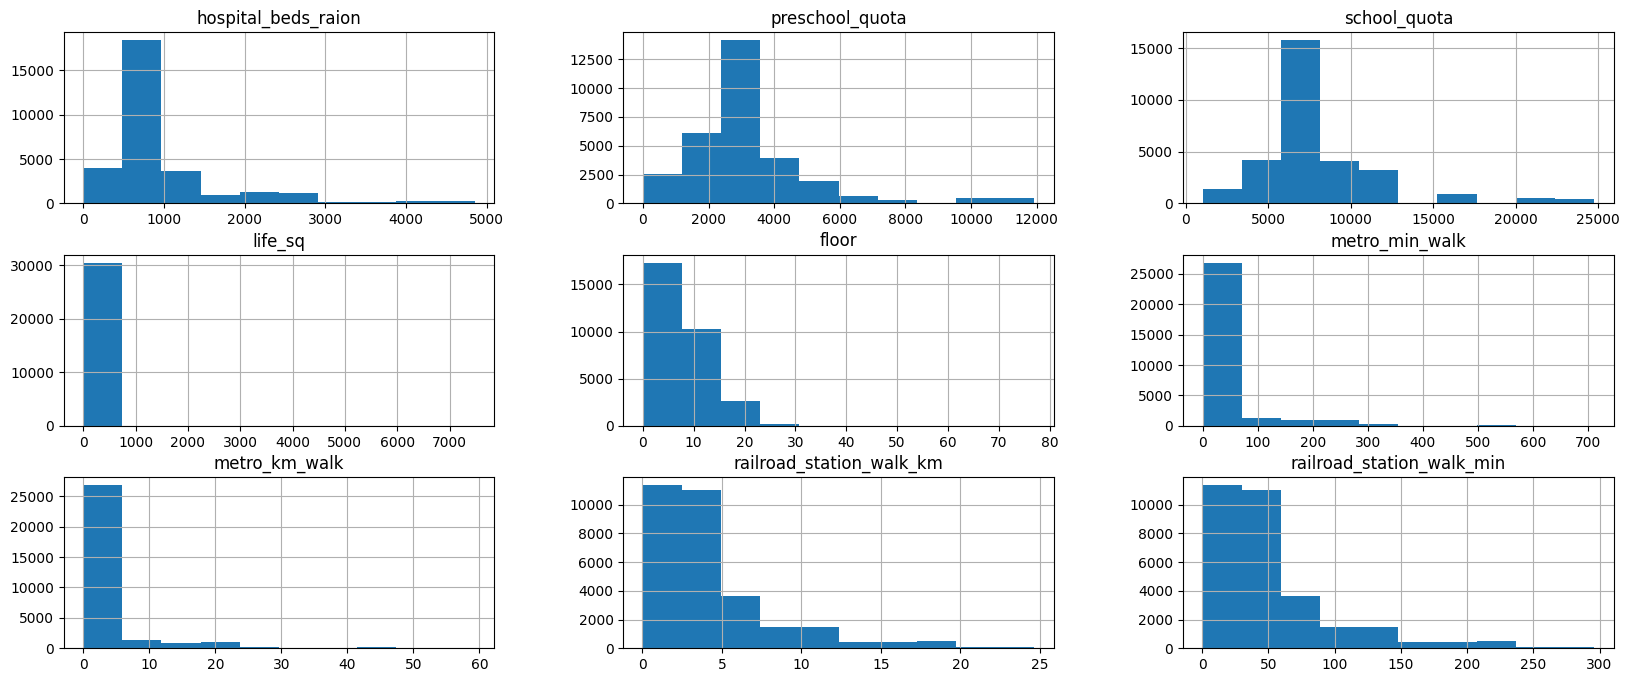

In [20]:
"""Посмотрим, на то, как изменились распределения наших признаков:"""

cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

In [21]:
"""ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

Если мы используем заполнение пропусков константами, может быть, имеет смысл сказать модели о том, что на этом месте был пропуск? 

Давайте добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определённом месте в таблице был пропуск. Это место в столбце-индикаторе будем помечать как True. 

Эта эвристика пытается снизить влияние искажения признака, указав модели на места, где мы «нафантазировали» данные.

Схематично метод можно представить следующим образом:



Посмотрим на реализацию. Как обычно, создадим копию indicator_data исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "was_null"), который получается из исходного с помощью применения метода isnull(). После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце, чтобы убедиться в результате:

"""
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [22]:
"""КОМБИНИРОВАНИЕ МЕТОДОВ

Наверняка вы уже догадались, что необязательно использовать один метод. Вы можете их комбинировать. Например, мы можем:

удалить столбцы, в которых более 30 % пропусков;
удалить записи, в которых более двух пропусков одновременно;
заполнить оставшиеся ячейки константами.
Посмотрим на реализацию такого подхода в коде:
"""
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [23]:
"""Выведем результирующее число строк и столбцов:"""

print(combine_data.shape)

(26800, 60)
